                                K-Means
-> O k-means é um algoritmo de aprendizado não supervisionado usado para
resolver problemas de agrupamento (clustering)

    -> Não supervisionado: Significa que você não precisa de dados rotulados
    (ou seja, não precisa dizer ao algoritmo o que é certo ou errado). Você
    apenas fornece os dados brutos, e o algoritmo encontra os padrões e 
    estruturas por conta própria.

    -> Agrupamento: O objetivo é dividir um conjunto de dados em k grupos
    distintos, onde K é um número predefinido por você. O algoritmo garante
    que os pontos em um mesmo grupo (ou cluster) sejam mais parecidos entre
    si do que com os pontos de dados de outros grupos.


                            Para que serve?
-> O k-means é usado principalmente para:

    -> 1. Segmentação de clientes: Separar clientes com base em hábitos
    de compra ou dados demográficos.

    -> 2. Análise de dados: Identificar grupos naturais ou anomalias em
    um grande conjunto de dados.

    -> 3. Processamento de imagem: Agrupar pixels de cores semelhantes para
    compressão ou segmentação de imagens.


                    Como o k-means funciona (o algoritmo)
-> 1.Inicialização

    -> Você escolhe o número de grupos que deseka formar (o valor de k).

    -> O algoritmo seleciona k pontos aleatórios nos dados. Esses pontos
    são chamados de centroides (o centro inicial de cada grupo).

-> 2.Atribuição (Clustering)

    -> Para cada ponto de dado no seu conjunto, o algoritmo calcula a 
    distância desse ponto para todos os k centroides

    -> O ponto de dado é, então, atribuido ao centroide mais próximo.
    Isso forma os k grupos inciais.

-> 3 Atualização (Movimento dos centroides)

    -> Depois que todos os pontos são atribuidos, os centroides originais
    são removidos.

    -> O novo centroide de cada grupo é calculado como a média (o mean, 
    por isso o nome k-means) de todos os pontos de dado que foram atribuidos
    aquele grupo.

-> 4.Repetição

    -> Os passos 2 e 3 são repetidos continuamente: 

        -> Reatribuir todos os pontos de dado aos seus novos centroides
        mais próximos.

        -> Recalcular a posição dos centroides (o novo ponto médio)

-> Condição de parada

    -> O processo para quando:

        -> Os centroides nao se movem significativamente em relação ao
        passo anterior.

        -> Nenhum ponto de dado muda de grupo

        -> O número máximo de iterações (predefinido) é atigindo.

-> O resultado final são k grupos onde a variação (distância) entre os
pontos dentro de cada grupo é minimizada.

Import das bibliotecas necessárias

In [1]:
# Import da biblioteca que irá acessar e manipular os dados
import pandas as pd

# Import da biblioteca que irá manipular arrays e realizar cálculos
# matemáticos
import numpy as np

# Biblioteca que permite a construção e visualização de gráficos
import matplotlib.pyplot as plt

# Import da classe means da biblioteca cluster do módulo sklearn
from sklearn.cluster import KMeans

# Import do meu arquivo de funções
from minhasfuncoes import funcoes

In [2]:
base_de_dados = pd.read_csv('Dados/svbr.csv', delimiter=';')

In [3]:
base_de_dados.head()

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0


In [4]:
base_de_dados_array = funcoes.preencherDadosFaltantes(base_de_dados.to_numpy(), 1, 1)

In [5]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          47 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizações  46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [6]:
base_de_dados_array[:,1] = base_de_dados_array[:, 1].astype("int")

base_de_dados_array = funcoes.preencherDadosFaltantes(base_de_dados_array, 2, 2)

base_de_dados_array[:, 2] = base_de_dados_array[:, 2].astype("int")

In [9]:
base_de_dados.at[28, 'Inscritos'] = base_de_dados_array[28][1]

base_de_dados.at[28, 'Visualizações'] = base_de_dados_array[28][2]

base_de_dados.Inscritos = base_de_dados.Inscritos.astype("int")

base_de_dados.Visualizações = base_de_dados.Visualizações.astype("int")

x = pd.DataFrame({'Inscritos': base_de_dados_array[:, 1], 'Visualizações': base_de_dados_array[:, 2]})

x.head()

,Inscritos,Visualizações
0,13438,406590
1,35241,868235
2,31680,2856508
3,25100,150000
4,32788,1575456


100%|██████████| 10/10 [00:01<00:00,  9.19it/s]


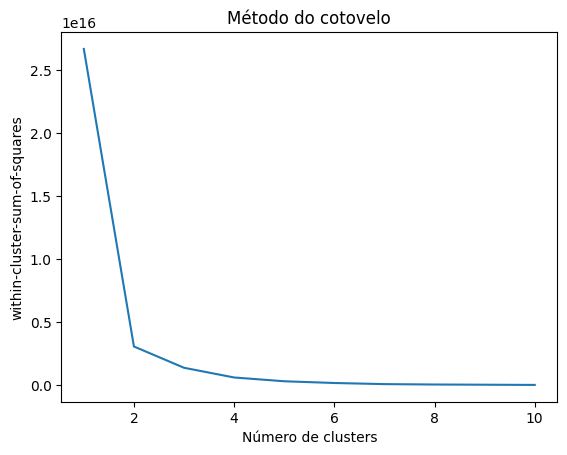

In [11]:
import tqdm

wcss = []

for i in tqdm.tqdm(range(1, 11)):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)

plt.title("Método do cotovelo")

plt.xlabel('Número de clusters')

plt.ylabel('within-cluster-sum-of-squares')

plt.show()